
# Covid-19 Overview in Greece

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [New cases graph](#new_cases_graph)
* [New deaths graph](#new_deaths_graph)
* [Total cases graph](#total_cases_graph)
* [Total deaths graph](#total_deaths_graph)
* [Prediction of total cases](#prediction_total_cases)
* [Prediction of total deaths](#prediction_total_deaths)
* [Prediction of new deaths](#prediction_new_deaths)
* [Prediction of new cases](#prediction_new_cases)

# Introduction <a name="introduction"></a>



## Data <a name="data"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import scipy
import plotly
import folium
from folium import plugins
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from lime import lime_tabular
import plotly.express as px
import plotly.graph_objects as go
import os

In [2]:
!wget -nv https://covid19.who.int/WHO-COVID-19-global-data.csv
print('File downloaded!')
file_name=('WHO-COVID-19-global-data.csv')
df_raw=pd.read_csv(file_name)
print('File copied to DataFrame!')
os.remove("WHO-COVID-19-global-data.csv")
print("File Removed!")

File downloaded!
File copied to DataFrame!
File Removed!


2020-12-13 12:25:36 URL:https://covid19.who.int/WHO-COVID-19-global-data.csv [3465221/3465221] -> "WHO-COVID-19-global-data.csv" [1]


In [3]:
df_raw.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


#### Removing data from all the countries except Greece

In [4]:
df_raw=df_raw[df_raw['Country'].str.contains('Greece')]
df_raw.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
27945,2020-01-03,GR,Greece,EURO,0,0,0,0
27946,2020-01-04,GR,Greece,EURO,0,0,0,0
27947,2020-01-05,GR,Greece,EURO,0,0,0,0
27948,2020-01-06,GR,Greece,EURO,0,0,0,0
27949,2020-01-07,GR,Greece,EURO,0,0,0,0


#### Removing unnecessary data columns

In [5]:
df_raw=df_raw.drop(columns=["Country_code", "WHO_region", "Country"])
df_raw.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
27945,2020-01-03,0,0,0,0
27946,2020-01-04,0,0,0,0
27947,2020-01-05,0,0,0,0
27948,2020-01-06,0,0,0,0
27949,2020-01-07,0,0,0,0


#### Renaming columns

In [6]:
df_raw=df_raw.rename(columns={"Cumulative_cases": "Total_cases", "Cumulative_deaths": "Total_deaths"})
df_raw.head()

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
27945,2020-01-03,0,0,0,0
27946,2020-01-04,0,0,0,0
27947,2020-01-05,0,0,0,0
27948,2020-01-06,0,0,0,0
27949,2020-01-07,0,0,0,0


#### Sorting the dataframe by Date

In [7]:
df_raw=df_raw.sort_values(by='Date_reported', ascending=False)
df_raw.head()

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28289,2020-12-12,1395,122648,102,3472
28288,2020-12-11,1533,121253,81,3370
28287,2020-12-10,1675,119720,95,3289
28286,2020-12-09,1324,118045,102,3194
28285,2020-12-08,1250,116721,89,3092


#### Converting 'Date_reported' to datetime

In [8]:
df_raw.Date_reported = pd.to_datetime(df_raw.Date_reported).dt.date

In [9]:
df_raw.head(10)

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28289,2020-12-12,1395,122648,102,3472
28288,2020-12-11,1533,121253,81,3370
28287,2020-12-10,1675,119720,95,3289
28286,2020-12-09,1324,118045,102,3194
28285,2020-12-08,1250,116721,89,3092
28284,2020-12-07,903,115471,101,3003
28283,2020-12-06,1383,114568,98,2902
28282,2020-12-05,1648,113185,98,2804
28281,2020-12-04,1882,111537,100,2706
28280,2020-12-03,2185,109655,89,2606


#### Correcting the deviation of the day

In [10]:
df_copy = df_raw.copy()
df_copy['Date_reported']=df_copy['Date_reported'].shift(-1)
df_copy.head()

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28289,2020-12-11,1395,122648,102,3472
28288,2020-12-10,1533,121253,81,3370
28287,2020-12-09,1675,119720,95,3289
28286,2020-12-08,1324,118045,102,3194
28285,2020-12-07,1250,116721,89,3092


In [11]:
df_copy = df_copy.iloc[:-310]

In [12]:
df_copy=df_copy.sort_values(by='Total_cases', ascending=True)

In [13]:
df_copy.style.background_gradient(cmap='Reds')

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28255,2020-11-07,2555,54809,34,749
28256,2020-11-08,1889,56698,35,784
28257,2020-11-09,1489,58187,41,825
28258,2020-11-10,2383,60570,41,866
28259,2020-11-11,2751,63321,43,909
28260,2020-11-12,3316,66637,50,959
28261,2020-11-13,3038,69675,38,997
28262,2020-11-14,2835,72510,38,1035
28263,2020-11-15,1695,74205,71,1106
28264,2020-11-16,2198,76403,59,1165


# New cases graph<a name="new_cases_graph"></a>

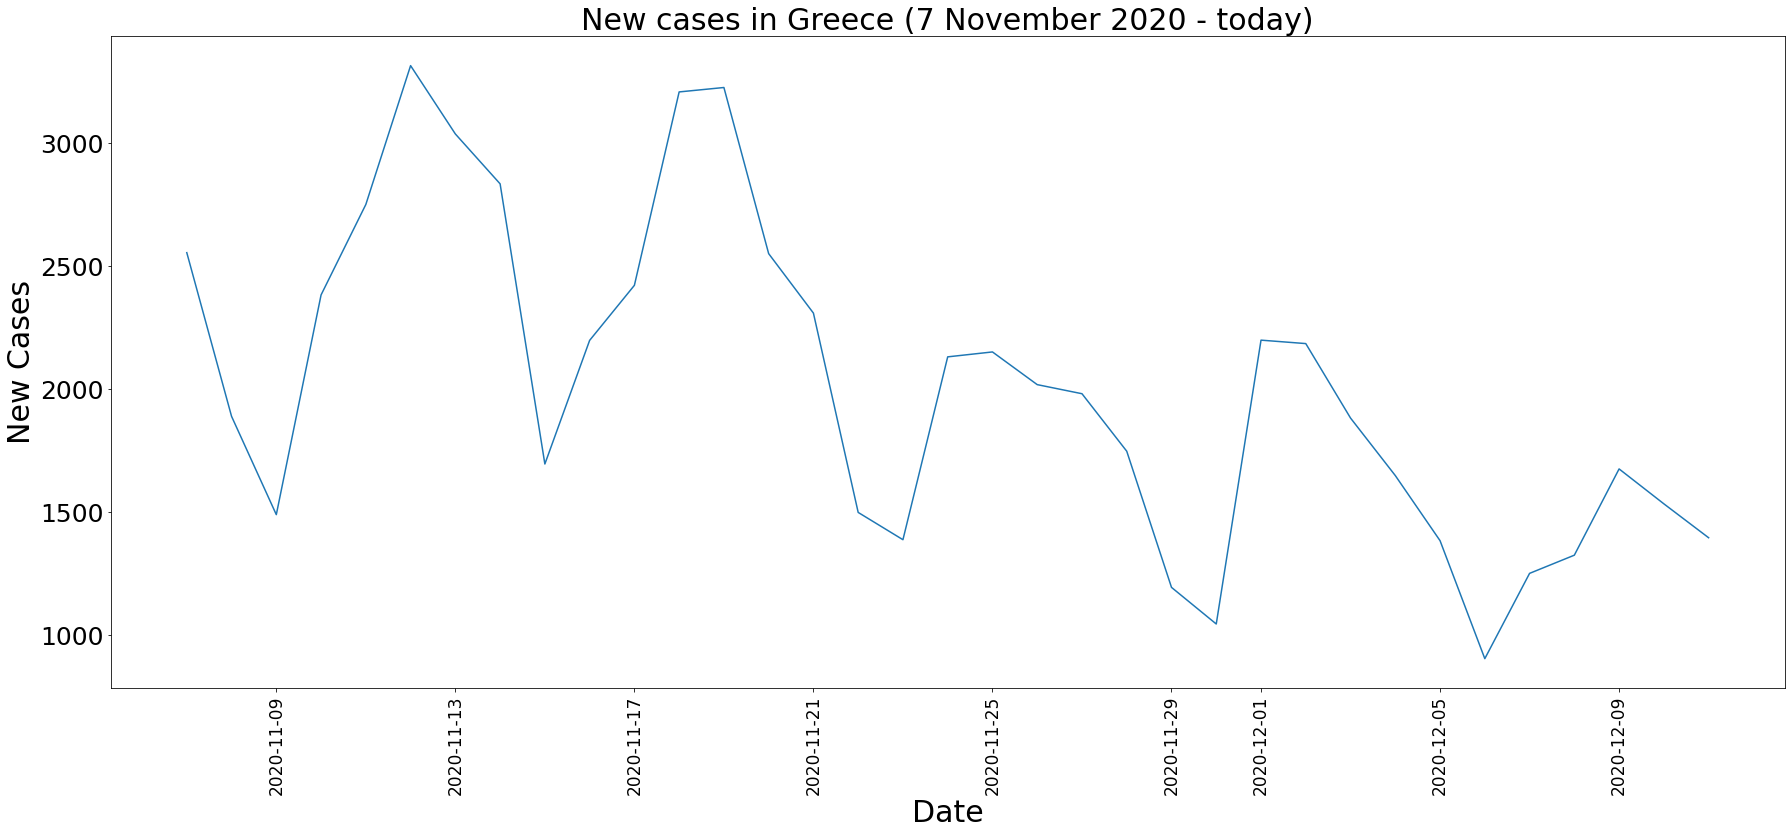

In [14]:
plt.figure(figsize=(30,12))
plt.title('New cases in Greece (7 November 2020 - today)', fontsize=30)
plt.ylabel('New Cases', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['New_cases'])

# New deaths graph<a name="new_deaths_graph"></a>

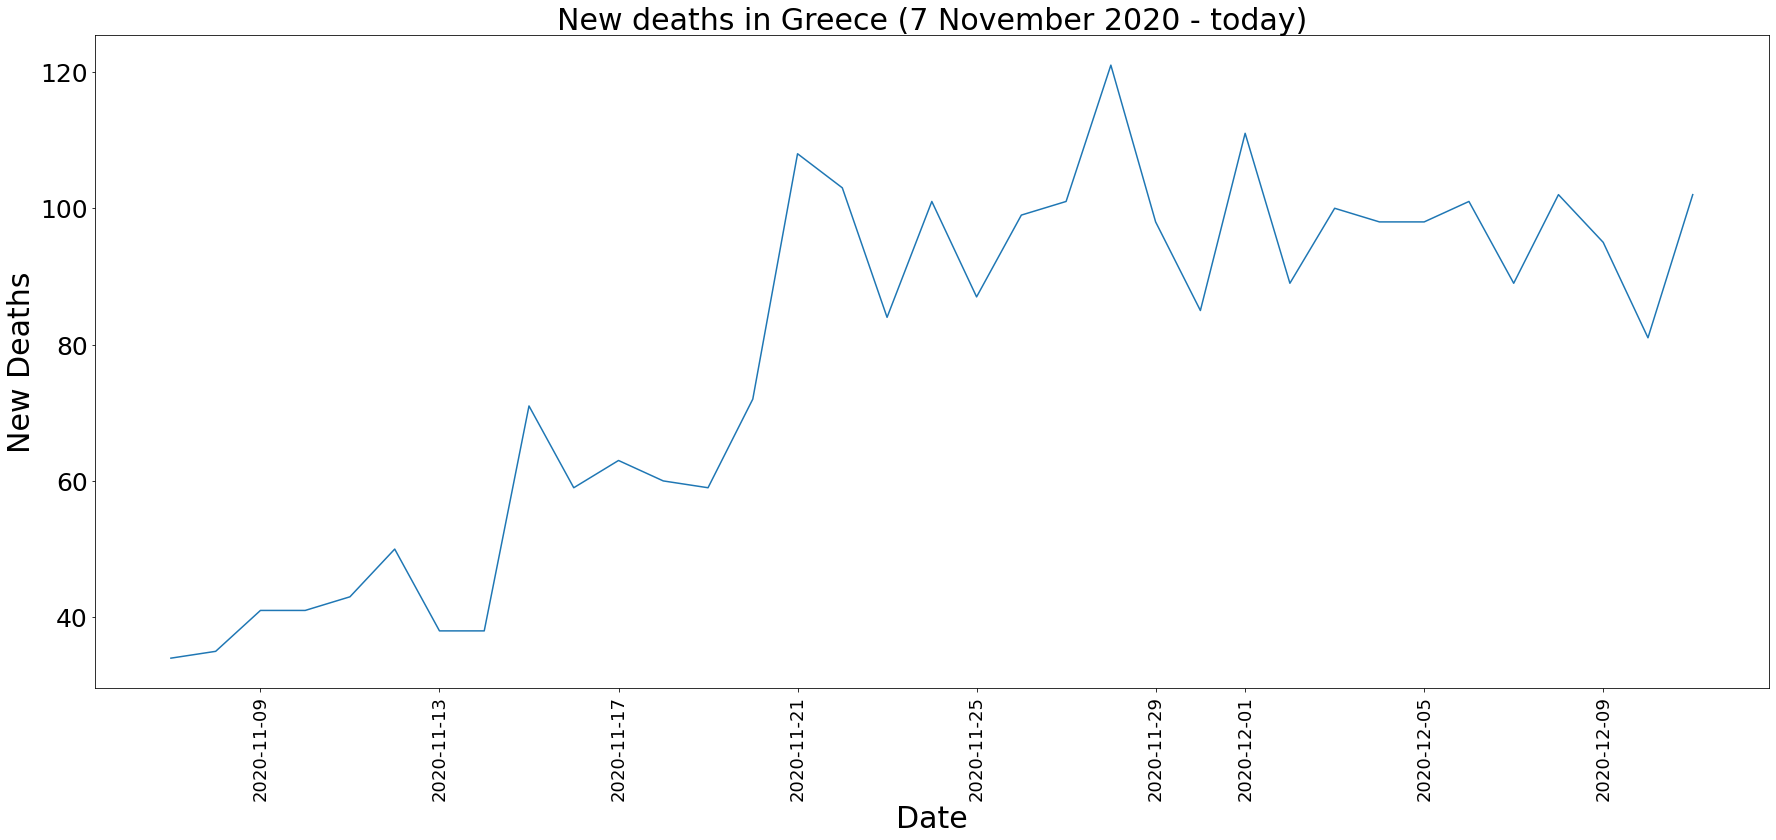

In [15]:
plt.figure(figsize=(30,12))
plt.title('New deaths in Greece (7 November 2020 - today)',fontsize=30)
plt.ylabel('New Deaths',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='y', labelsize=25)
plt.tick_params(axis='x', labelsize=18)
plt.plot(df_copy['Date_reported'], df_copy['New_deaths'])

# Total cases graph<a name="total_cases_graph"></a>

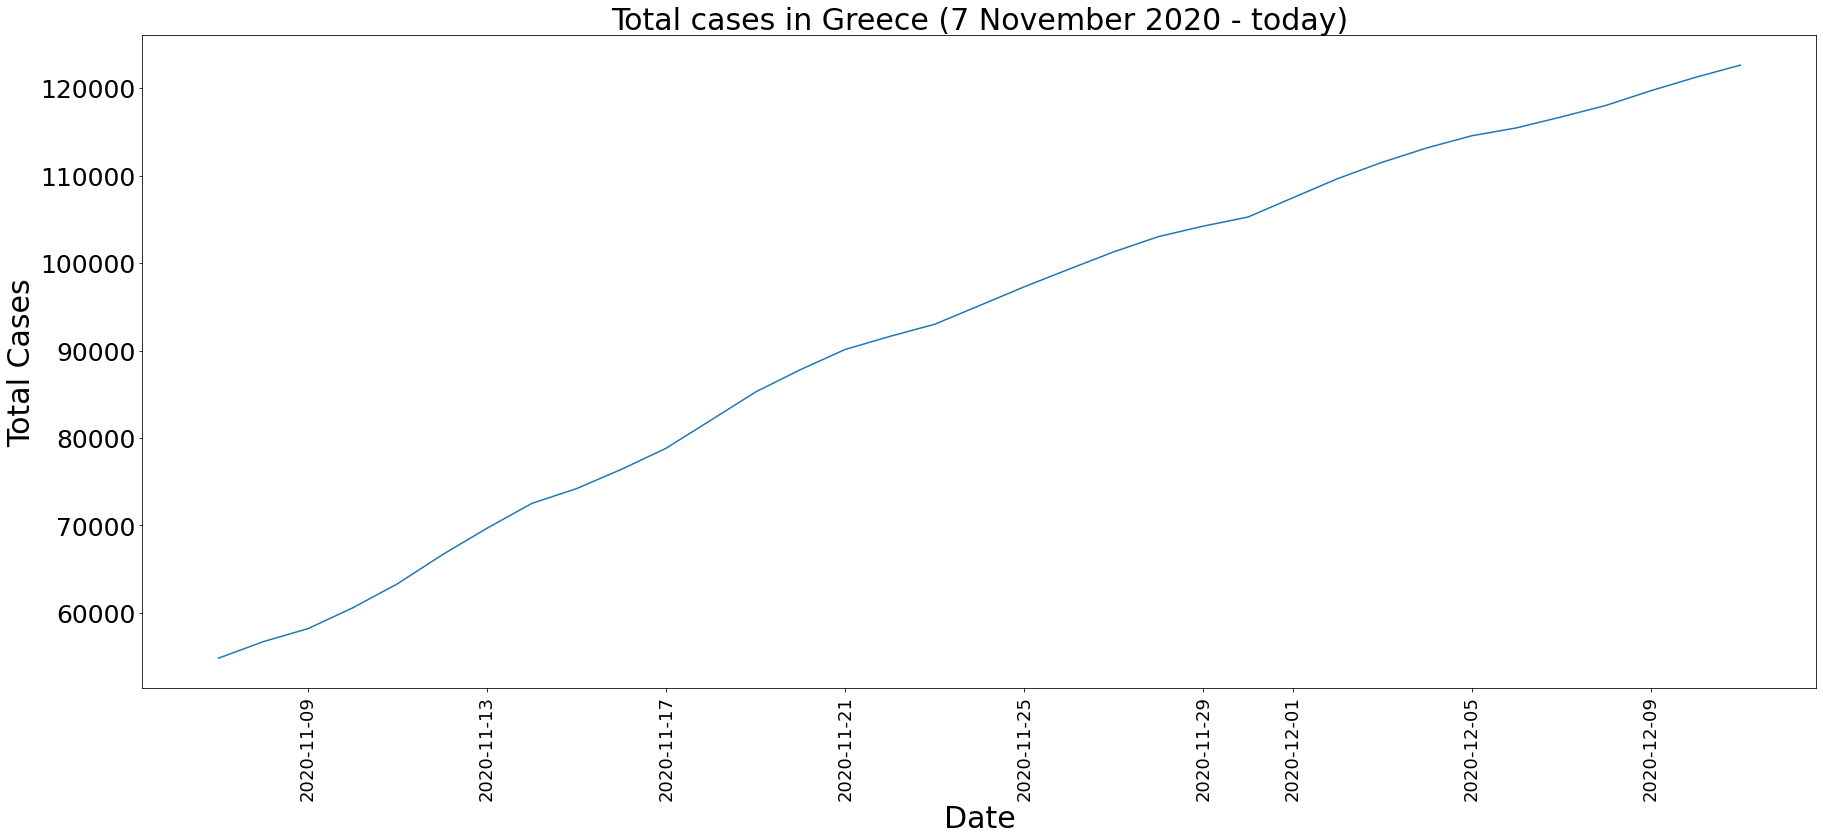

In [16]:
plt.figure(figsize=(30,12))
plt.title('Total cases in Greece (7 November 2020 - today)',fontsize=30)
plt.ylabel('Total Cases',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['Total_cases'])

# Total deaths graph<a name="total_deaths_graph"></a>

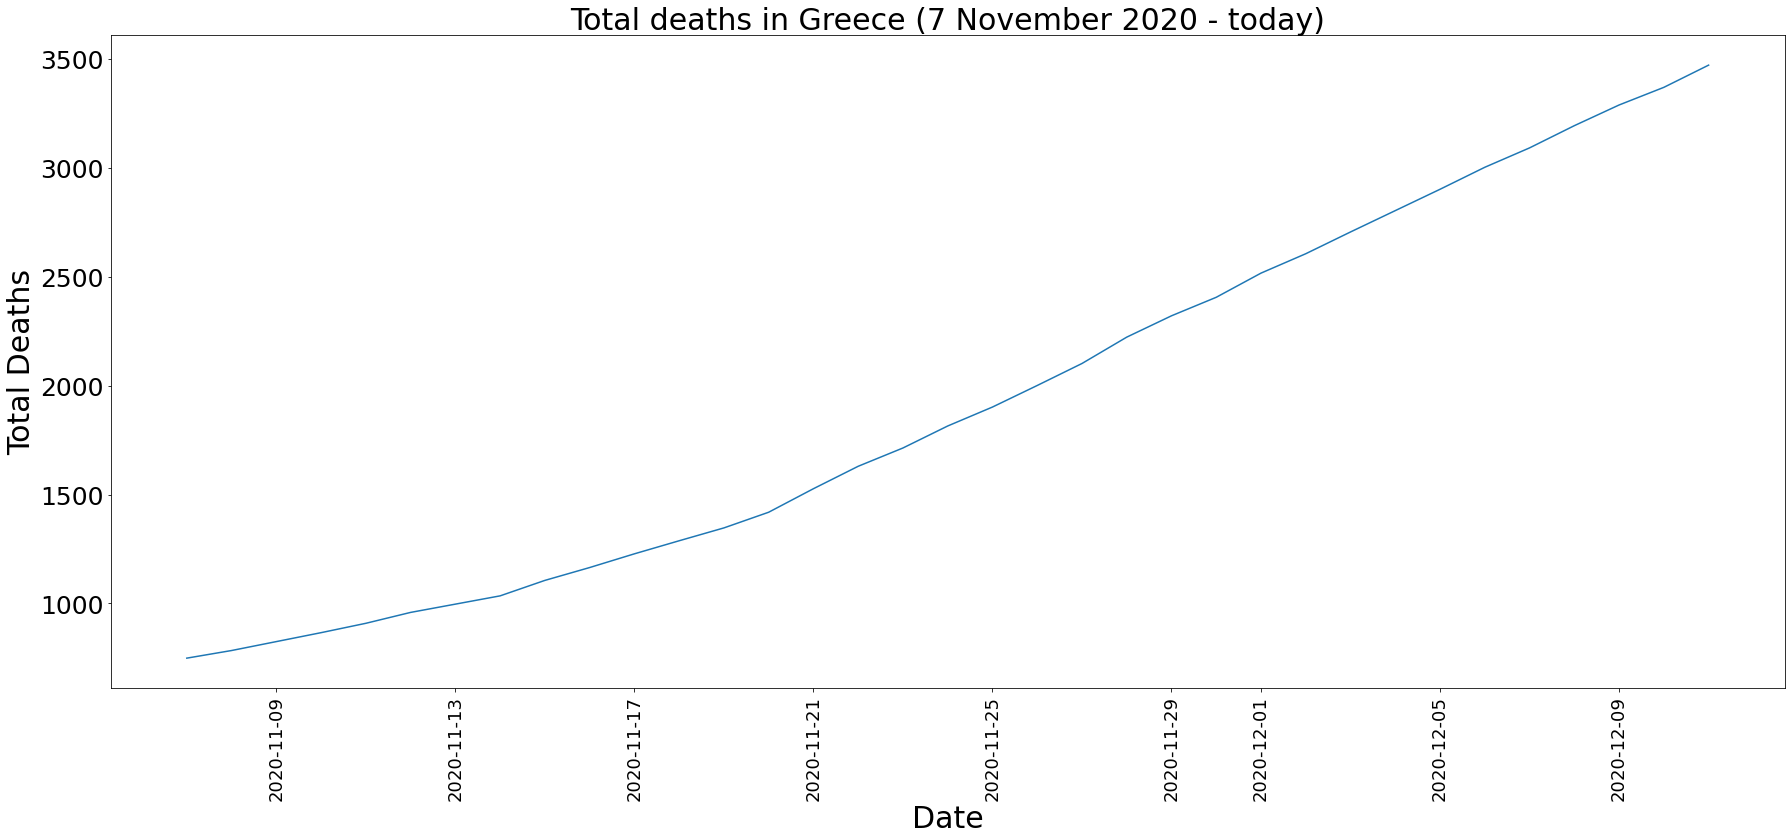

In [17]:
plt.figure(figsize=(30,12))
plt.title('Total deaths in Greece (7 November 2020 - today)',fontsize=30)
plt.ylabel('Total Deaths',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['Total_deaths'])

## Using Prophet to predict covid-19 behavior to 1 week from today

In [18]:
from fbprophet import Prophet

In [19]:
new_cases=df_copy.groupby('Date_reported').sum()['New_cases'].reset_index()
new_deaths=df_copy.groupby('Date_reported').sum()['New_deaths'].reset_index()
total_cases=df_copy.groupby('Date_reported').sum()['Total_cases'].reset_index()
total_deaths=df_copy.groupby('Date_reported').sum()['Total_deaths'].reset_index()

## Prediction of Total Cases<a name="prediction_total_cases"></a>

In [20]:
total_cases.tail()

,Date_reported,Total_cases
30,2020-12-07,116721
31,2020-12-08,118045
32,2020-12-09,119720
33,2020-12-10,121253
34,2020-12-11,122648


In [21]:
total_cases.columns=['ds','y']

In [22]:
m=Prophet(interval_width=0.95)
m.fit(total_cases)
future_total_cases=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
forecast_total_cases=m.predict(future_total_cases)
forecast_total_cases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
35,2020-12-12,124232.646789,123897.480726,124565.522519
36,2020-12-13,125118.730880,124222.311621,125994.405825
37,2020-12-14,126113.046122,124490.694533,127643.395952
38,2020-12-15,127609.414309,125257.335634,129949.044043


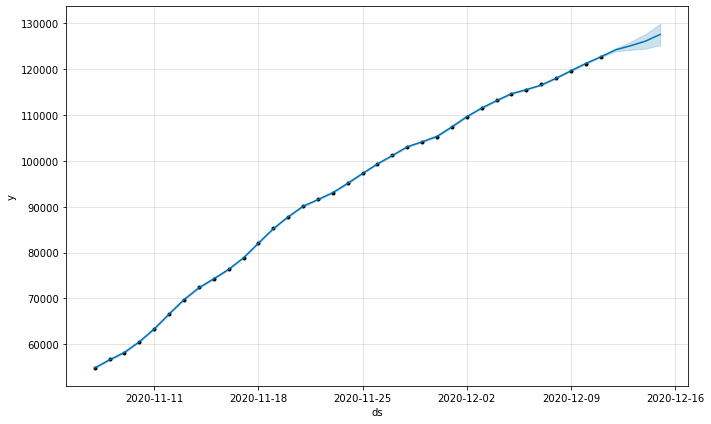

In [24]:
forecast_total_cases_plot=m.plot(forecast_total_cases)

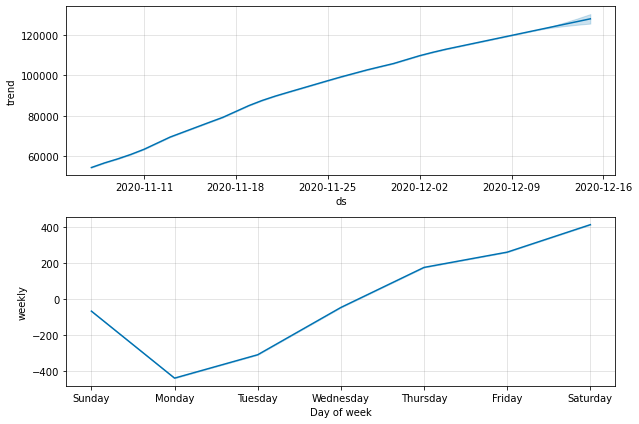

In [25]:
forecast_total_cases_plot=m.plot_components(forecast_total_cases)

## Prediction of total deaths<a name="prediction_total_deaths"></a>

In [26]:
total_deaths.tail()

,Date_reported,Total_deaths
30,2020-12-07,3092
31,2020-12-08,3194
32,2020-12-09,3289
33,2020-12-10,3370
34,2020-12-11,3472


In [27]:
total_deaths.columns=['ds','y']

In [28]:
m=Prophet(interval_width=0.95)
m.fit(total_deaths)
future_total_deaths=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
forecast_total_deaths=m.predict(future_total_deaths)
forecast_total_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
35,2020-12-12,3571.512608,3562.123802,3580.587508
36,2020-12-13,3674.284408,3660.032220,3688.960153
37,2020-12-14,3762.394398,3733.861853,3789.866213
38,2020-12-15,3862.467795,3823.453525,3904.331086


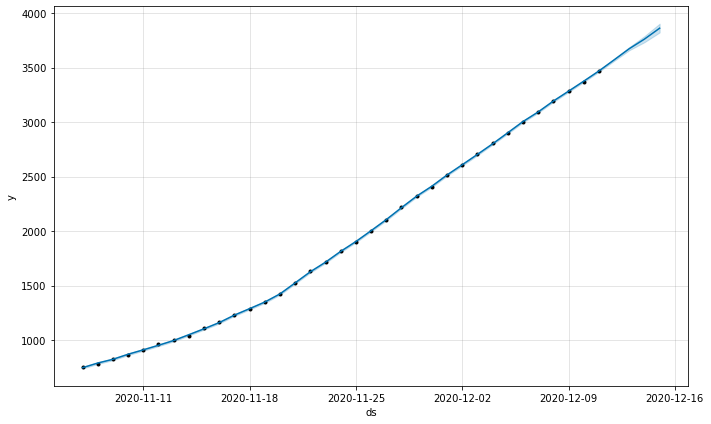

In [30]:
forecast_total_deaths_plot=m.plot(forecast_total_deaths)

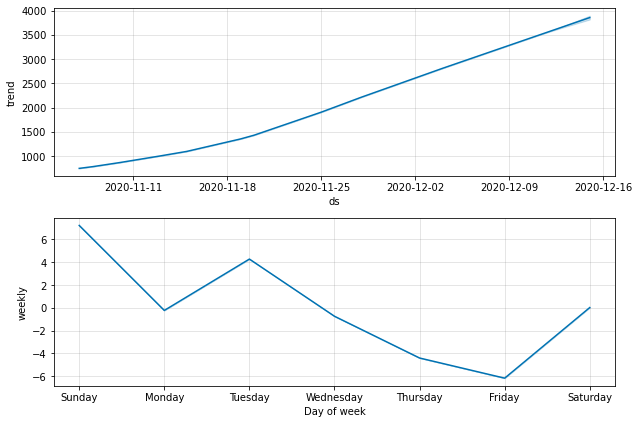

In [31]:
forecast_total_deaths_plot=m.plot_components(forecast_total_deaths)

## Prediction of new deaths <a name="prediction_new_deaths"></a>

In [32]:
new_deaths.tail()

,Date_reported,New_deaths
30,2020-12-07,89
31,2020-12-08,102
32,2020-12-09,95
33,2020-12-10,81
34,2020-12-11,102


In [33]:
new_deaths.columns=['ds','y']

In [34]:
m=Prophet(interval_width=0.95)
m.fit(new_deaths)
future_new_deaths=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
forecast_new_deaths=m.predict(future_new_deaths)
forecast_new_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
35,2020-12-12,124.829398,97.700822,151.694422
36,2020-12-13,126.623367,99.952739,154.046635
37,2020-12-14,116.594669,88.703693,142.443919
38,2020-12-15,128.609107,102.459018,158.501147


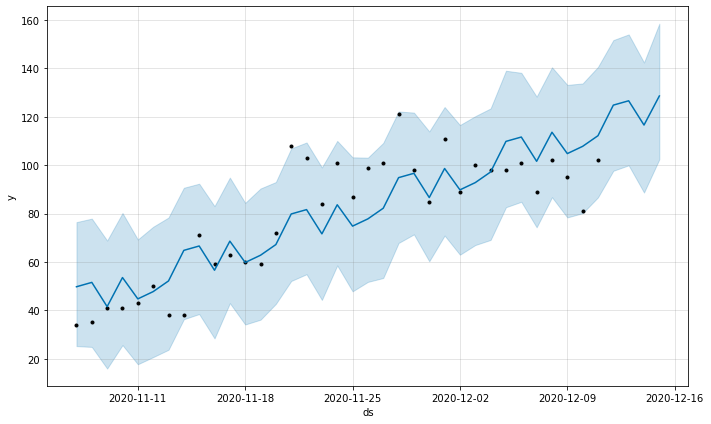

In [36]:
forecast_new_deaths_plot=m.plot(forecast_new_deaths)

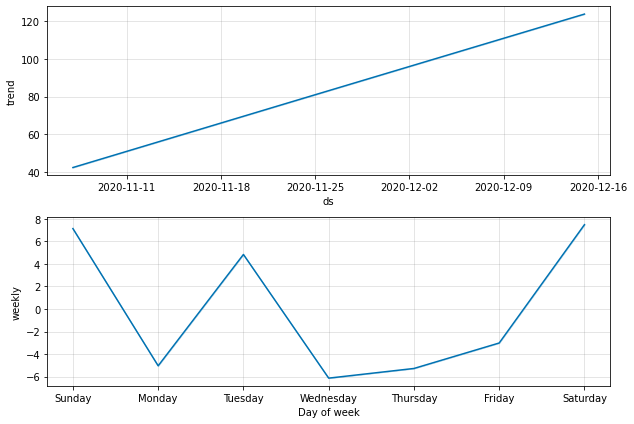

In [37]:
forecast_new_deaths_plot=m.plot_components(forecast_new_deaths)

## Prediction of new cases<a name="prediction_new_cases"></a>

In [38]:
new_cases.tail()

,Date_reported,New_cases
30,2020-12-07,1250
31,2020-12-08,1324
32,2020-12-09,1675
33,2020-12-10,1533
34,2020-12-11,1395


In [39]:
new_cases.columns=['ds','y']

In [40]:
m=Prophet(interval_width=0.95)
m.fit(new_cases)
future_new_cases=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
forecast_new_cases=m.predict(future_new_cases)
forecast_new_cases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
35,2020-12-12,1216.182093,701.187424,1713.546701
36,2020-12-13,486.172393,-33.632816,1021.769456
37,2020-12-14,524.130314,12.316986,1035.390564
38,2020-12-15,1142.112720,656.216575,1642.357212


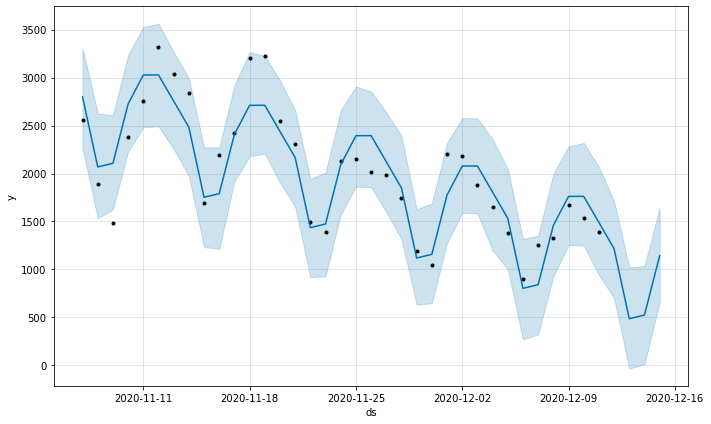

In [42]:
forecast_new_cases_plot=m.plot(forecast_new_cases)

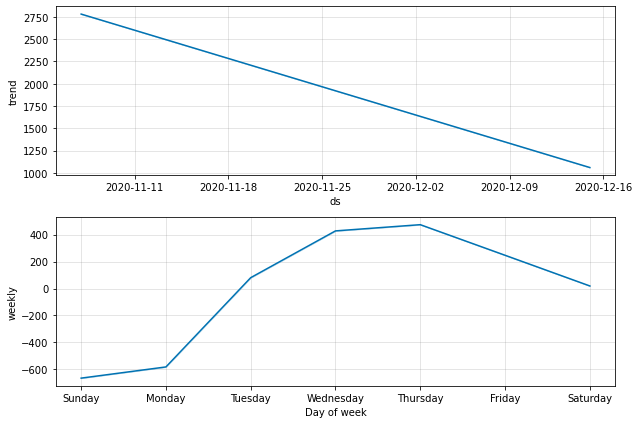

In [43]:
forecast_new_cases_plot=m.plot_components(forecast_new_cases)